In [1]:
import os
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] = "/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda:0" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)


# os.chdir(r"C:\Users\24112\Desktop\item\test")
# print("loading path...", os.getcwd())


loading path... C:\Users\24112\Desktop\item\test


## Extract embedding for v10x DLPFC(slide=151674)

In [2]:

data_root = "./Dataset/DLPFC"
sample_name = "151674"
negi = 12
print("start sampleid:" + sample_name)


start sampleid:151674


In [3]:

GCAST.set_seed(random_seed)
n_clusters = 7
adata, graph_dict = GCAST.Load10xST(data_root, sample_name, n_clusters,n_top_genes = 3000).data()

net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device, model_name=f"{sample_name}")
net.train_with_dec()

 16%|█▌        | 161/1000 [00:28<02:29,  5.61it/s]


In [4]:
net.load_model()
feat, _, _ = net.eval_model()
adata.obsm["emb"] = feat
GCAST.mclust_R(adata, n_clusters=n_clusters, use_rep="emb", random_seed=random_seed)
GCAST.evaluate_cluster(adata)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
mclust ARI:0.6370 NMI:0.7317 AMI:0.7310 purity:0.8151, homogeneity:0.7211, completeness:0.7427, v_measure:0.7317


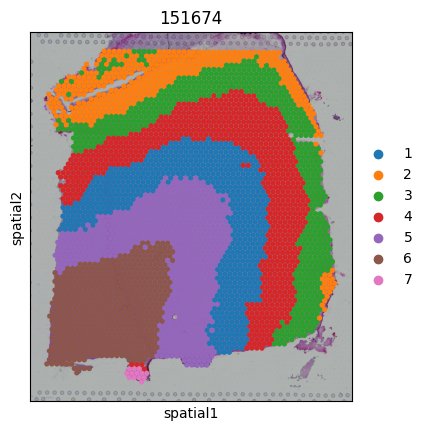

In [5]:
GCAST.plot_spatial(adata, color="mclust", title=f"{sample_name}",  save=False, show=True)